<a href="https://colab.research.google.com/github/PatrykCiwinski/Topic_modeling-LDA/blob/main/Topic_modeling(LDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LDA

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import textwrap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!gdown 1iboAP6jwWe0FnhYlz97Q_62Udc2aTNp4

Downloading...
From: https://drive.google.com/uc?id=1iboAP6jwWe0FnhYlz97Q_62Udc2aTNp4
To: /content/bbc_text_cls.csv
100% 5.09M/5.09M [00:00<00:00, 24.5MB/s]


In [4]:
df=pd.read_csv('bbc_text_cls.csv')

In [5]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
#stop-words
stop_words=set(stopwords.words('english'))
stop_words = stop_words.union({'said','would','could','told','also','one','two','mr','new','year'})

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [14]:
df['cleaned_text']=df['text'].apply(clean_text)

In [15]:
vectorizer = CountVectorizer(max_features=1000)

In [16]:
X=vectorizer.fit_transform(df['cleaned_text'])

In [17]:
no_topics=df['labels'].nunique()

In [18]:
lda=LatentDirichletAllocation(n_components=no_topics)

In [19]:
Z = lda.fit_transform(X)

In [20]:
topics = lda.components_

In [21]:
# Print the topics with their terms
terms = vectorizer.get_feature_names_out()

for index, component in enumerate(topics):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index+1)+": ",top_terms_list)

Topic 1:  ['game', 'time', 'first', 'player', 'england', 'world', 'year']
Topic 2:  ['film', 'best', 'award', 'music', 'show', 'star', 'year']
Topic 3:  ['people', 'technology', 'mobile', 'phone', 'service', 'user', 'computer']
Topic 4:  ['company', 'market', 'firm', 'bank', 'sale', 'price', 'growth']
Topic 5:  ['government', 'labour', 'party', 'election', 'people', 'minister', 'blair']


# We can forecast topics as follows:

Topic 1:sport,
Topic 2:entertainment,
Topic 3:tech,
Topic 4:business,
Topic 5:entertainment

In [22]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

In [23]:
i = np.random.choice(len(df))
z=Z[i]
topics=np.arange(5)+1

In [24]:
z_df = pd.DataFrame(z)
max_value = z_df.idxmax()

In [25]:
max_idx = max_value.tolist()

In [26]:
print(wrap(df.iloc[i]['cleaned_text']))

Dems 'bold election policy Charles Kennedy voter Liberal Democrats
offer honest choice next general election With party battling impose
lowest tax Kennedy going looming election pledged increase taxation
bold policy certainly ensures choice Dems With party previous pledge
increase tax penny pound spend public service already adopted
government switched tack promising levy modest increase amount
earnings £100,000 allow finance series pledge They scrap student fee
finance free long term care elderly replace council local income That
last policy well paying others pensioner particular le Labour Tories
attacked policy unworkable properly costed Inevitably insist need
raise tax fund improvement service Tories claim improve service tax
£35bn efficiency saving Labour offered £22bn saving precise proposal
although little chance propose increase many way argument Dems others
taxation spending echo sort argument raged Labour Tories 1980s early
1990s unlike Tory-Labour debate belief voter ready m

In [30]:
pred_topics = {'Topic 1':'sports',
'Topic 2':'entertainment',
'Topic 3':'tech',
'Topic 4':'business',
'Topic 5':'politics'}

In [31]:
values = list(pred_topics.values())


Text(0.5, 1.0, 'True label: politics, pred_label politics')

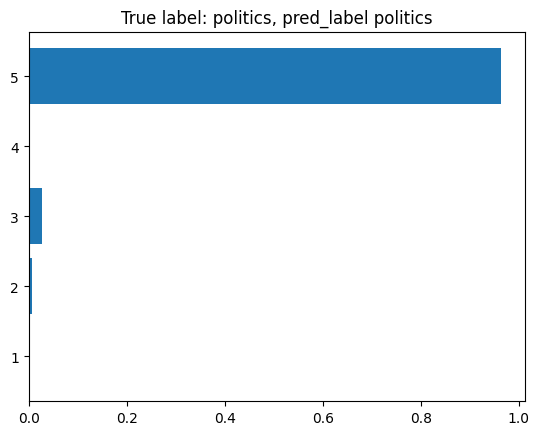

In [32]:
fig,ax= plt.subplots()
ax.barh(topics,z)
ax.set_title(f'True label: {df.iloc[i]["labels"]}, pred_label {values[max_value[0]]}')